t (s)   h(t) (m)
  0.0   1.0000
  1.0   1.2966
  2.0   1.5343
  3.0   1.7285
  4.0   1.8890
  5.0   2.0227
  6.0   1.7533
  7.0   1.5301
  8.0   1.3478
  9.0   1.2007
 10.0   1.0836
 11.0   0.6256
 12.0   0.2926
 13.0   0.0847
 14.0   0.0031
 15.0   -0.0000
 16.0   -0.0000
 17.0   -0.0000
 18.0   -0.0000
 19.0   -0.0000
 20.0   -0.0000


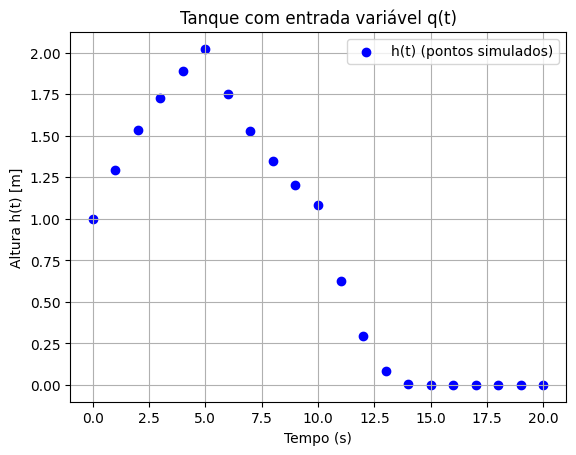

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros do sistema
A = 12.0     # área do tanque
C = 6.0      # constante de vazão de saída

# Tempo de simulação
t_ini = 0
t_fim = 20
dt = 1.0
tsim = np.arange(t_ini, t_fim + dt, dt)

# Entrada: vazão variável q(t)
q = np.zeros_like(tsim)
q[tsim < 5] = 10   # de 0 a 5 segundos
q[(tsim >= 5) & (tsim < 10)] = 5
q[tsim >= 10] = 0  # depois de 10 s, sem entrada

# EDO com entrada variável q
def modelo(t, h, q_val):
    h = max(h[0], 0.0)  # garantir h ≥ 0
    dhdt = (q_val - C * np.sqrt(h)) / A
    return [dhdt]

# Inicialização da solução
h_nlin = np.zeros_like(tsim)
h_nlin[0] = 1.0  # condição inicial: altura de 1 m

# Integração por etapas
for i in range(1, len(tsim)):
    sol = solve_ivp(modelo, [tsim[i-1], tsim[i]], [h_nlin[i-1]], args=(q[i-1],))
    h_nlin[i] = sol.y[0, -1]

# Mostrar pontos simulados
print("t (s)   h(t) (m)")
for t, h in zip(tsim, h_nlin):
    print(f"{t:5.1f}   {h:.4f}")

# Plotagem
plt.scatter(tsim, h_nlin, color='blue', label='h(t) (pontos simulados)')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura h(t) [m]')
plt.title('Tanque com entrada variável q(t)')
plt.grid(True)
plt.legend()
plt.show()
